In [1]:
import getAllData as gd
import numpy as np
import pandas as pd
import random
import json
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.util import mark_negation

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [2]:
data = pd.read_csv('merged.csv', index_col=0)
token = RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize

In [3]:
filtered = gd.filterData(data.copy())
stemmed = gd.stemData(filtered.copy())
bow_filter_stem_tfidf_data = gd.bow(stemmed, token, 'bow_filter_stem_tdidf.txt')

In [9]:
bow_filter_stem_tfidf_data = gd.bow(stemmed, token, 'bow_filter_stem_tdidf.txt')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(bow_filter_stem_tfidf_data, data['Rating'], test_size=0.2, random_state=1) # Note test is never used!!
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

------------------------------------------------------
Logistic max_iter=10000
FILTER-STEM BOW-Train 90.19727172515158
[[ 3794  7380]
 [ 1157 74757]]
FILTER-STEM BOW-Valid 89.61074750258354
[[ 1141  2581]
 [  435 24873]]
FILTER-STEM BOW-Test 89.32828108852911
[[ 1156  2623]
 [  475 24776]]


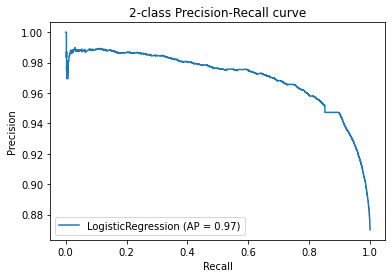

In [11]:

classifiers = [
    (LogisticRegression(max_iter=10000), 'Logistic max_iter=10000') 
]

for clf, name in classifiers:
    print('------------------------------------------------------')
    print(name)
    clf.fit(X_train, y_train)
    predictTrain = clf.predict(X_train)
    accuracy_score = metrics.accuracy_score(predictTrain, y_train)
    print('FILTER-STEM BOW-Train ' + str(accuracy_score * 100))
    print(metrics.confusion_matrix(y_train, predictTrain))
    predictval = clf.predict(X_val)
    accuracy_score = metrics.accuracy_score(predictval, y_val)
    print('FILTER-STEM BOW-Valid ' + str(accuracy_score * 100))
    print(metrics.confusion_matrix(y_val, predictval))
    predicttest = clf.predict(X_test)
    accuracy_score = metrics.accuracy_score(predicttest, y_test)
    print('FILTER-STEM BOW-Test ' + str(accuracy_score * 100))
    print(metrics.confusion_matrix(y_test, predicttest))
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')

In [8]:
clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
clf.fit(X_train, y_train)
predictTrain = clf.predict(X_train)
accuracy_score = metrics.accuracy_score(predictTrain, y_train)
print('FILTER-STEM BOW-Train ' + str(accuracy_score * 100))
print(metrics.confusion_matrix(y_train, predictTrain))
predictval = clf.predict(X_val)
accuracy_score = metrics.accuracy_score(predictval, y_val)
print('FILTER-STEM BOW-Valid ' + str(accuracy_score * 100))
print(metrics.confusion_matrix(y_val, predictval))
predicttest = clf.predict(X_test)
accuracy_score = metrics.accuracy_score(predicttest, y_test)
print('FILTER-STEM BOW-Test ' + str(accuracy_score * 100))
print(metrics.confusion_matrix(y_test, predicttest))

FILTER-STEM BOW-Train 89.64954988058057
[[ 2955  8219]
 [  795 75119]]
FILTER-STEM BOW-Valid 89.4660695831898
[[  940  2782]
 [  276 25032]]
FILTER-STEM BOW-Test 89.27661040303134
[[  947  2832]
 [  281 24970]]


In [8]:
clfM = MultinomialNB().fit(X_train, y_train)
predictM = clfM.predict(X_val)
accuracy_scoreM = metrics.accuracy_score(predictM, y_val)
print('FILTER-STEM TFIDF-Multinomial ' + str(accuracy_scoreM * 100))
print(metrics.confusion_matrix(y_val, predictM))

FILTER-STEM TFIDF-Multinomial 88.44219374397134
[[  423  3289]
 [   66 25250]]


In [9]:
#SVM
clfS = LinearSVC(max_iter=20000).fit(X_train, y_train)
predictS = clfS.predict(X_val)
accuracy_scoreS = metrics.accuracy_score(predictS, y_val)
print('FILTER-STEM TFIDF-SVM ' + str(accuracy_scoreS * 100))
print(metrics.confusion_matrix(y_val, predictS))

FILTER-STEM TFIDF-SVM 89.39988976160949
[[  902  2810]
 [  267 25049]]


In [10]:
#KNN
clfK = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predictK = clfK.predict(X_val)
accuracy_scoreK = metrics.accuracy_score(predictK, y_val)
print('FILTER-STEM TFIDF-KNN-1 ' + str(accuracy_scoreK * 100))
print(metrics.confusion_matrix(y_val, predictK))

FILTER-STEM TFIDF-KNN-1 84.40126774149097
[[ 1463  2249]
 [ 2279 23037]]


In [11]:
#KNN
clfK = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictK = clfK.predict(X_val)
accuracy_scoreK = metrics.accuracy_score(predictK, y_val)
print('FILTER-STEM TFIDF-KNN-3 ' + str(accuracy_scoreK * 100))
print(metrics.confusion_matrix(y_val, predictK))

FILTER-STEM TFIDF-KNN-3 86.68871434477057
[[ 1280  2432]
 [ 1432 23884]]


In [12]:
#KNN
clfK = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
predictK = clfK.predict(X_val)
accuracy_scoreK = metrics.accuracy_score(predictK, y_val)
print('FILTER-STEM TFIDF-KNN-5 ' + str(accuracy_scoreK * 100))
print(metrics.confusion_matrix(y_val, predictK))

FILTER-STEM TFIDF-KNN-5 87.39148408433238
[[ 1527  2185]
 [ 1475 23841]]


In [13]:
#DECISION TREE
clfD = DecisionTreeClassifier().fit(X_train, y_train)
predictD = clfD.predict(X_val)
accuracy_scoreD = metrics.accuracy_score(predictD, y_val)
print('FILTER-STEM TFIDF-Decision Tree ' + str(accuracy_scoreD * 100))
print(metrics.confusion_matrix(y_val, predictD))

FILTER-STEM TFIDF-Decision Tree 86.57158605484359
[[ 1397  2315]
 [ 1583 23733]]


In [14]:
#DECISION TREE
clfD = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X_train, y_train)
predictD = clfD.predict(X_val)
accuracy_scoreD = metrics.accuracy_score(predictD, y_val)
print('FILTER-STEM TFIDF-Decision Tree ' + str(accuracy_scoreD * 100))
print(metrics.confusion_matrix(y_val, predictD))

FILTER-STEM TFIDF-Decision Tree 87.21234669973819
[[    0  3712]
 [    0 25316]]


In [15]:
#DECISION TREE
clfD = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="random").fit(X_train, y_train)
predictD = clfD.predict(X_val)
accuracy_scoreD = metrics.accuracy_score(predictD, y_val)
print('FILTER-STEM TFIDF-Decision Tree ' + str(accuracy_scoreD * 100))
print(metrics.confusion_matrix(y_val, predictD))

FILTER-STEM TFIDF-Decision Tree 87.21234669973819
[[    0  3712]
 [    0 25316]]


In [16]:
#DECISION TREE
clfD = DecisionTreeClassifier(max_depth=5, splitter="random").fit(X_train, y_train)
predictD = clfD.predict(X_val)
accuracy_scoreD = metrics.accuracy_score(predictD, y_val)
print('FILTER-STEM TFIDF-Decision Tree ' + str(accuracy_scoreD * 100))
print(metrics.confusion_matrix(y_val, predictD))

FILTER-STEM TFIDF-Decision Tree 87.8358825961141
[[  342  3370]
 [  161 25155]]
